First of all, it is important to use the command `%matplotlib notebook` in order to interactive plot the figures. 

In [2]:
%matplotlib notebook

### Loading modules

We need to load the modules to our python environment using the command import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="whitegrid", color_codes=True)

### Loading the data

Because the dataset was downloaded as a `csv file`, we will use the **Pandas** command `read_csv` that automatically reads the file into a `DataFrame`.

In [4]:
hepatitis_data = pd.read_csv("dataset_55_hepatitis.csv")

We can check the shape of our DataFrame to match the specifications provided for our dataset: 155 patients(rows), 19 features+1 class (columns)

In [5]:
hepatitis_data.shape

(155, 20)

As we can see above, the dataset has 155 rows corresponding to the number of patients included in this study, and 20 columns, corresponding to the features or characteristics collected for each patient.

### Exploratory Analysis

An important part of doing predictions with Machine Learning techniques is to perform Exploratory Data Analysis (EDA). This is useful for getting to know your data, looking at it from different perspectives, describing  and summarizing it without making any assumption in order to detect any potential problems.

First, we can inspect our data to see if we need to clean it. We will start by using the `head` command, that will show us the first 5 rows of our DataFrame.

In [6]:
hepatitis_data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1,85,18,4,?,no,LIVE
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135,42,3.5,?,no,LIVE
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96,32,4,?,no,LIVE
3,31,female,?,yes,no,no,no,yes,no,no,no,no,no,0.7,46,52,4,80,no,LIVE
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1,?,200,4,?,no,LIVE


As we can see above, there are missing values identified with the '?' symbol. Knowing the data types of the variable included in our dataset is a crucial piece of information.  We can check this by using `dtypes` function.

In [7]:
hepatitis_data.dtypes

AGE                 int64
SEX                object
STEROID            object
ANTIVIRALS         object
FATIGUE            object
MALAISE            object
ANOREXIA           object
LIVER_BIG          object
LIVER_FIRM         object
SPLEEN_PALPABLE    object
SPIDERS            object
ASCITES            object
VARICES            object
BILIRUBIN          object
ALK_PHOSPHATE      object
SGOT               object
ALBUMIN            object
PROTIME            object
HISTOLOGY          object
Class              object
dtype: object

As we can see above, 19 of our 20 variable appear to be `object` data type. Some of these variable are categoricals and some of them are numericals.

Because for machine learning algorithms, it is requiered to have numerical data, we will convert categorical data that has values 'no', 'yes' to 0 and 1 respectively. Another important point to consider is to convert the binary survival variable (`Class`) encoded now as 'DIE', 'LIVE' to numerical categories (0 and 1, respectively). We will use for this task, the function `replace`

In [8]:
replacements = {'no': 0,
               'yes': 1,
               'DIE': 0,
               'LIVE': 1,
               '?': np.nan,
               'female': 0,
               'male': 1}

hepatitis_data.replace(replacements, inplace = True)

Lastly, we will convert all of our columns in the dataset to **float** type.

In [9]:
hepatitis_data = hepatitis_data.astype(float)

**Class Imbalance**  
Class imbalance occurs when the total number of observations in one class is significantly lower that the observations in the other class. Machine learning algorithms perform well when the number of observations in each class are similar but when there is a high class imbalance (90% in one class, 10% in the other class), problems arise leading to misclassification. 

In order to check whether our data set suffers from class imbalance, we can calculate what percentage of the data belongs to each category. 

In [10]:
total_of_patients = hepatitis_data.shape[0]
total_of_live_patients = (np.sum(hepatitis_data['Class'] == 1)/total_of_patients)*100
total_of_dead_patients = (np.sum(hepatitis_data['Class'] == 0)/total_of_patients)*100
print("Living patients:", round(total_of_live_patients,2),"%")
print("Dead patients:", round(total_of_dead_patients,2),"%")

Living patients: 79.35 %
Dead patients: 20.65 %


We can observe that even though our dataset is not perfectly balanced, it does not suffer from high class imbalance. So we can continue with our analysis. 

Now, we can use the function `describe` that generates descriptive statistics summarizing the central tendency, dispersion and shape of our dataset’s distribution, excluding NaN values (See *Pandas Documentation*). We will not use all of our variables because many of them are discrete variables, so we will only get the mentioned parameters for the numerical variables.

In [11]:
numerical_variables = ['AGE', 'BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT']
hepatitis_data[numerical_variables].describe()

,AGE,BILIRUBIN,PROTIME,ALBUMIN,ALK_PHOSPHATE,SGOT
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


We can observed in the table that the patients belong to an age bracket of 7-78 years, with a mean of 41.2 and a median of 39. There are missing values in most of the variables but in particular in PROTIME  where we only have 88 observations. If we pay attention to the means of the different variables, it is interesting to note that they display a moderate variance; the range goes from 1.42 (`BILIRUBIN`) to 105.35 (`ALK_PHOSPHATE`). Also, the variables `SGOT` and `ALK_PHOSPATE` show a high standard deviation and their distribution is right skewed due to the fact that the mean is higher than the median. The rest of the variables appear to be normally distributed (mean ~ median). The distribution of our variables is important to considered because they could affect lately our machine learning algorithm. So we could evaluate to perform a transformation to fix the skewness observed.

On the other hand, we will use the function `apply` and `value_counts` to get the counts in every level (0 or 1 that corresponded to 'no' and 'yes') for each discrete variable in our dataset.

In [12]:
categorical_variables = ['SEX' , 'STEROID', 'ANTIVIRALS', 'FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE',
'SPIDERS','ASCITES','VARICES', 'HISTOLOGY']
hepatitis_data[categorical_variables].apply(pd.Series.value_counts)

,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY
0.0,139,76,131,54,93,122,25,84,120,99,130,132,85
1.0,16,78,24,100,61,32,120,60,30,51,20,18,70


In this case, there is a marked predominance of observations belonging to level 0 in the variable SEX which means that the dataset include more female than male patients. Likewise, the variables `ANTIVIRALS`, `ANOREXIA`, `ASCITES` and `VARICES` include much more observations in the class `0` than in the class `1`. This could point out that these features are differentially present in the patients and could be interesting variables influencing their survival.

The next step is to create some visuals in order to understand further our dataset by exploring relationships existent in it. For this, it is very useful to use the `seaborn` library that we imported previously. Seaborn facilitates strong attractive statistical graphics that are easy to code.

We will here take some minutes to evaluate the variables included in our dataset, in particular, some that are interesting regarding liver disease. Like in many chronic diseases, there are significant differences between pediatric and adult patients in the outcome and presentation of the liver disease. Our dataset includes children and adults, so our variable `AGE` could be a factor influencing the survival. 
On the other hand, enzymes such as Alkaline phosphatase (`ALK_PHOSPHATE`) as well as Aspartate Aminotransferase (`SGOT`) are normally produced in the liver but elevated levels present in the serum of patients are a reflection of hepatic damage and indicates that the liver is not working correctly. Moreover, elevated levels of bilirubin (`BILIRUBIN`), albumin (`ALBUMIN`) as well as Prothrombin time (`PROTIME`)  can indicate a malfunctioning liver. The presence of anorexia (`ANOREXIA`) and ascites (`ASCITES`) appeared later in patients with liver disease and normally, indicates a poor prognosis. Because all of these mentioned variable are indicators of a more or less severe liver damage and malfunction, we wold evaluate them to see their relationship and explore if they could be important for our predictive model.

As we already observed, our dataset contains a lot of `NaN` values. How to handle missing values is an extensive topic that we will not address here, but it is important to notice that there are several ways to overcome this issue and the best way to do it has to be evaluated for each situation. In our case, we just want to make some graphs, so we are going to drop them but using the Pandas function `.dropna()`. We will create a new data frame by selecting only the interesting value that we mentioned above.

In [13]:
hepatitis_analysis = hepatitis_data.dropna()
interesting_values_x = ['AGE', 'ANOREXIA','BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ASCITES', 'ALK_PHOSPHATE', 'SGOT', 'Class']
hepatitis_analysis = hepatitis_analysis[interesting_values_x]
hepatitis_analysis.head()

,AGE,ANOREXIA,BILIRUBIN,PROTIME,ALBUMIN,ASCITES,ALK_PHOSPHATE,SGOT,Class
5,34.0,0.0,0.9,75.0,4.0,0.0,95.0,28.0,1.0
10,39.0,0.0,1.3,85.0,4.4,0.0,78.0,30.0,1.0
11,32.0,0.0,1.0,54.0,3.7,0.0,59.0,249.0,1.0
12,41.0,0.0,0.9,52.0,3.9,0.0,81.0,60.0,1.0
13,30.0,0.0,2.2,78.0,4.9,0.0,57.0,144.0,1.0


We will continue plotting a histogram from the variables `SGOT` and `ALK_PHOSPHATE` to visualize and confirm that they have a right skewed distribution. In the seaborn library, the function `displot` allow as to plot a univariate distribution of observations. It is possible to plot both histograms side by side by using the function `subplot` of matplotlib.

<IPython.core.display.Javascript object>


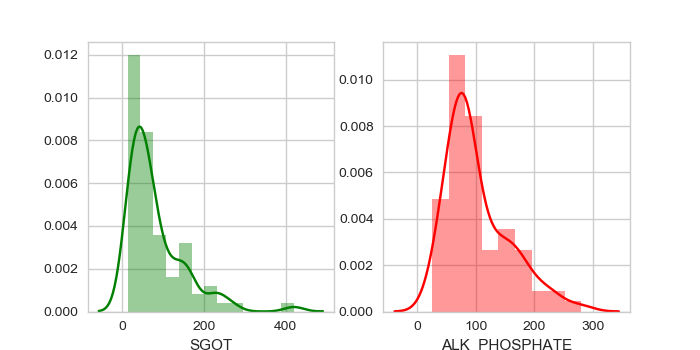

In [14]:
plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['SGOT'], color = 'Green')
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['ALK_PHOSPHATE'], color = 'red');

We can observed in the histograms that in fact there is a positive skew in both variables.
Then, we can make use of the `pairplot` function to visualize the relationship between the different numerical variables. One nice feature about seaborn is that we can use the parameter hue to show with different color in the plot, the different levels of a categorical variable. In our case, we are interesting in identifying the patients in Class 0 and 1.

<IPython.core.display.Javascript object>


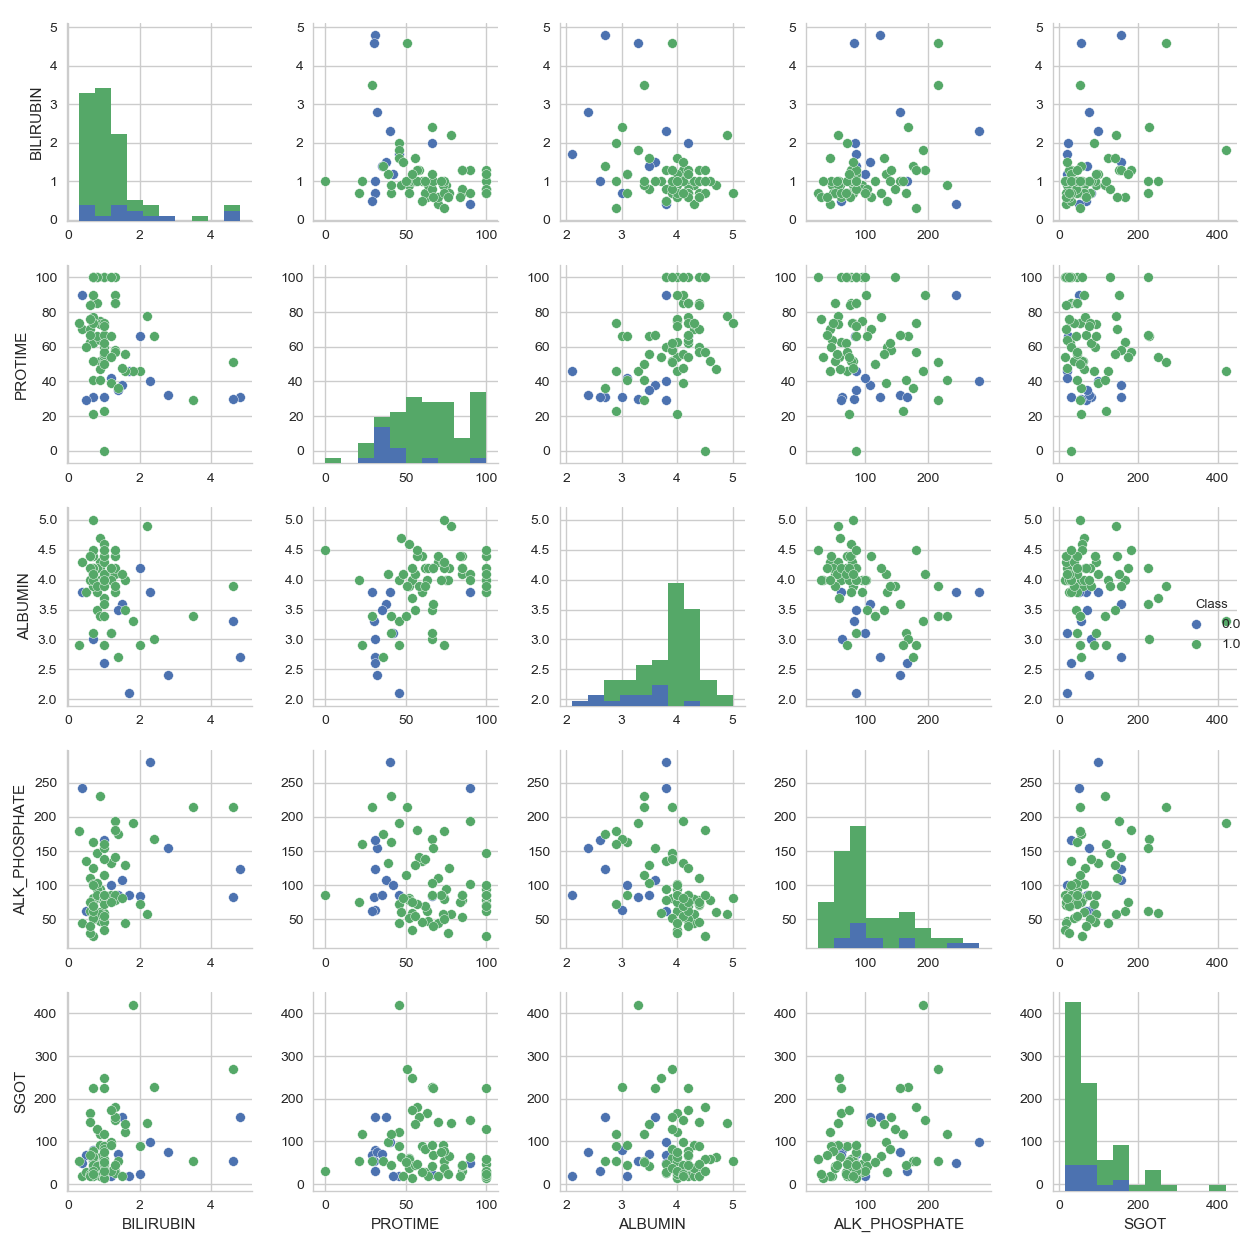

In [20]:
sns.pairplot(hepatitis_analysis, x_vars = ['BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT'], 
               y_vars = ['BILIRUBIN', 'PROTIME', 'ALBUMIN', 'ALK_PHOSPHATE', 'SGOT'], hue = 'Class')